In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

In [2]:
yf.pdr_override()
start = dt.datetime(2019, 12, 1)
now = dt.datetime.now()

stock = input("Enter a stock symbol: ")

In [3]:
# while stock != "quit":
df = pdr.get_data_yahoo(stock, start, now)
# df["High"].plot(label="High")
    # stock = input("Enter a stock symbol: ")

[*********************100%***********************]  1 of 1 completed


In [4]:
pivots=[]
dates=[]
counter=0
lastPivot=0

Range=[0,0,0,0,0,0,0,0,0,0]
dateRange=[0,0,0,0,0,0,0,0,0,0]

for i in df.index:
    currentMax = max(Range, default=0)
    value = round(df["High"][i],2)

    Range=Range[1:9]
    Range.append(value)
    dateRange=dateRange[1:9]
    dateRange.append(i)

    if currentMax == max(Range, default=0):
        counter+=1
    else:
        counter=0
    if counter==5:
        lastPivot=currentMax
        dateloc=Range.index(lastPivot)
        lastDate=dateRange[dateloc]
        pivots.append(lastPivot)
        dates.append(lastDate)

In [5]:
print()
print(str(pivots))
print(str(dates))


[103.21, 118.8, 68.1, 99.22, 102.62, 125.95, 123.67, 131.93, 175.67, 138.07, 158.73, 158.38, 172.68]
[Timestamp('2020-01-24 00:00:00'), Timestamp('2020-02-19 00:00:00'), Timestamp('2020-04-17 00:00:00'), Timestamp('2020-06-10 00:00:00'), Timestamp('2020-06-23 00:00:00'), Timestamp('2020-07-13 00:00:00'), Timestamp('2020-07-21 00:00:00'), Timestamp('2020-08-06 00:00:00'), Timestamp('2020-09-02 00:00:00'), Timestamp('2020-10-01 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-12-08 00:00:00')]


In [6]:
for i in zip(pivots, dates):
    print(i)

(103.21, Timestamp('2020-01-24 00:00:00'))
(118.8, Timestamp('2020-02-19 00:00:00'))
(68.1, Timestamp('2020-04-17 00:00:00'))
(99.22, Timestamp('2020-06-10 00:00:00'))
(102.62, Timestamp('2020-06-23 00:00:00'))
(125.95, Timestamp('2020-07-13 00:00:00'))
(123.67, Timestamp('2020-07-21 00:00:00'))
(131.93, Timestamp('2020-08-06 00:00:00'))
(175.67, Timestamp('2020-09-02 00:00:00'))
(138.07, Timestamp('2020-10-01 00:00:00'))
(158.73, Timestamp('2020-10-12 00:00:00'))
(158.38, Timestamp('2020-11-09 00:00:00'))
(172.68, Timestamp('2020-12-08 00:00:00'))


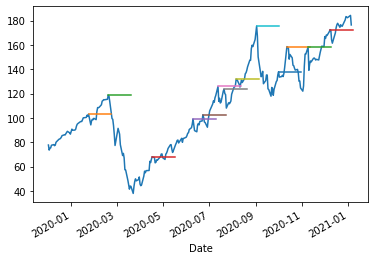

In [7]:
df["High"].plot(label="High")
for index in range(len(dates)):
    plt.plot_date([dates[index], dates[index]+dt.timedelta(days=30)], [pivots[index], pivots[index]], linestyle="-", marker=None)
plt.show()